### So this is basically my version of exploring the book "Hands-On-Machine-Learning with Scikit-Learn, Keras & Tensorflow"
This is my playcode for chapter 2 of the book. 

The original notebook used by the author can be found here:
https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb.

All credits to the master author Aurélien Geron! 

In [3]:
# Doing all the prerequsities like downloading every model required
import sys
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importing all other libraries required to download the dataset and work on it
import os
import tarfile
import urllib.request

#exact copy pasted code of downloading the dataset from the github repo
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [8]:
# Loaded the dataset yo! I know that's it's not much, this has a lot of data, but less than MNIST
Housing_data = pd.read_csv(os.path.join(HOUSING_PATH,"housing.csv"))
Housing_data.shape

(20640, 10)

In [9]:
#Doing some exploratory data analysis!
Housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

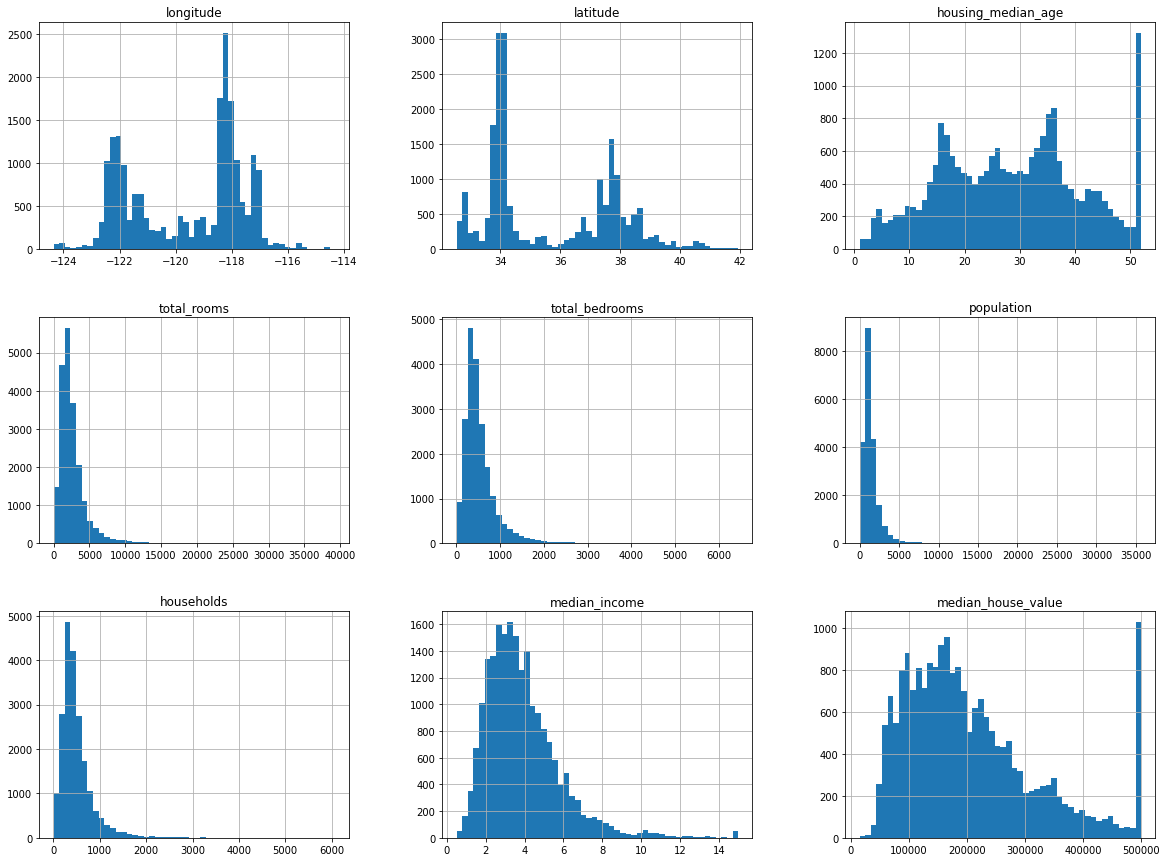

In [11]:
%matplotlib inline
Housing_data.hist(bins=50,figsize= (20,15))

### Data Exploration!

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

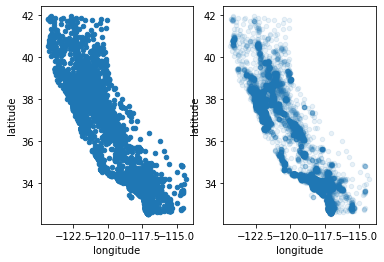

In [35]:
# simple plotting won't tell much data

fig, axes = plt.subplots(nrows=1, ncols=2)
axes
# fig
Housing_data.plot(kind = "scatter", x = "longitude", y = "latitude",ax = axes[0])
# # A better visualization plot
Housing_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, ax = axes[1])


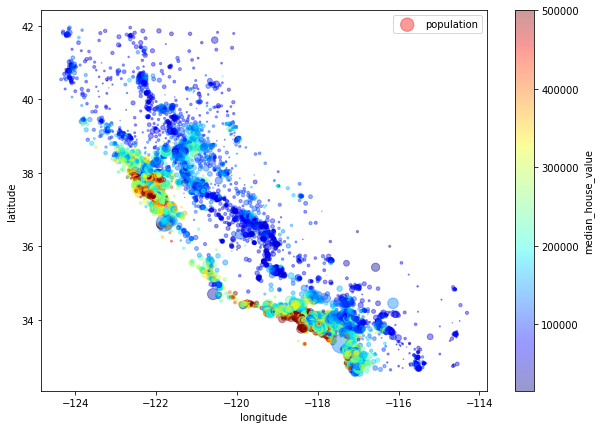

In [39]:
# Well this is the best plot money can buy! Straight from the book

Housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=Housing_data["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
# You can actually plot out the coasline of Boston America xD 
# This is done in the book, but I think it's just show off, so don't worry about it

In [41]:
# Looking for correlation between data
corr_matrix = Housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [44]:
# Looking like some of them are not even correlated with the data, which is shit for us!, So we have to do some tinkering.
# The reasons for tinkering is given in the book, so get a load of theory! After all that, this is the solution where we change some columns

Housing_data["rooms_per_household"] = Housing_data["total_rooms"]/Housing_data["households"]
Housing_data["bedrooms_per_room"] = Housing_data["total_bedrooms"]/Housing_data["total_rooms"]
Housing_data["population_per_household"]=Housing_data["population"]/Housing_data["households"]

### Preparation of data For Machine Learning Algos!

In [46]:
housing = Housing_data.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = Housing_data["median_house_value"].copy()

In [50]:
# Using Simple imputer to clean all data and replace all NaN values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# The only categorical data in our dataset is "ocean_proximity", so we'll remove that
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [51]:
X = imputer.transform(housing_num)

In [55]:
# This is with the the imputed values , so that no weird data is being in here
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
# And that ,Gentlemen, is how you do it

#### Handling Categorical values using One hot Encoder

In [58]:
from sklearn.preprocessing import OneHotEncoder
# This is the only categorical value!
housing_cat = housing[["ocean_proximity"]]

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray().shape

(20640, 5)

In [64]:
# Getting names of this categorical variables
names =cat_encoder.get_feature_names_out()  # get names for these features
one_hot_dataframe = pd.DataFrame(housing_cat_1hot, columns = names)
one_hot_dataframe
# df = pd.concat([df, df_oh], axis=1)

ValueError: Shape of passed values is (20640, 1), indices imply (20640, 5)